<a href="https://colab.research.google.com/github/Kesavika-abi/Data_Science/blob/main/college_admission_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [8]:
#load dataset
df = pd.read_csv('/content/student_performance_dataset.csv')
print(df.head())

   High_GPA  Extracurriculars  Parental_Income  Study_Hours  Entrance_Test  \
0      2.75                 0            66663            6             72   
1      3.90                 3            30708            3             69   
2      3.46                 4            64811            9             76   
3      3.20                 3            17811            5             62   
4      2.31                 5            71250           17             97   

   Distance_km Internet Final_Result  
0           37      Yes         Fail  
1           12      Yes         Fail  
2           49      Yes         Fail  
3           13      Yes         Fail  
4           23      Yes         Fail  


In [10]:
#preprocessing
df['Internet'] = df['Internet'].map({'Yes': 1, 'No': 0})
df['Final_Result_Binary'] = df['Final_Result'].map({'Pass': 1, 'Fail': 0})

In [9]:
#create score and grade
df['Score'] = df['Entrance_Test'] * 0.5 + df['High_GPA'] * 10 + df['Study_Hours'] * 1.5
df['Score'] = np.round(np.clip(df['Score'], 0, 100), 2)

df['Grade'] = pd.cut(df['Score'],
                     bins=[0, 50, 65, 80, 90, 100],
                     labels=['F', 'C', 'B', 'A', 'A+'])

In [11]:
#features
features = ['High_GPA', 'Extracurriculars', 'Parental_Income', 'Study_Hours',
            'Entrance_Test', 'Distance_km', 'Internet']

In [12]:
#binary classification
X = df[features]
y = df['Final_Result_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n🔍 Binary Classification Report (Pass/Fail):")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


🔍 Binary Classification Report (Pass/Fail):
[[15  2]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.33      0.33      0.33         3

    accuracy                           0.80        20
   macro avg       0.61      0.61      0.61        20
weighted avg       0.80      0.80      0.80        20



In [13]:
#regression
y_reg = df['Score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print("\n📈 Regression MSE (Predicting Score):", mean_squared_error(y_test_reg, y_pred_reg))


📈 Regression MSE (Predicting Score): 0.34332605443303355


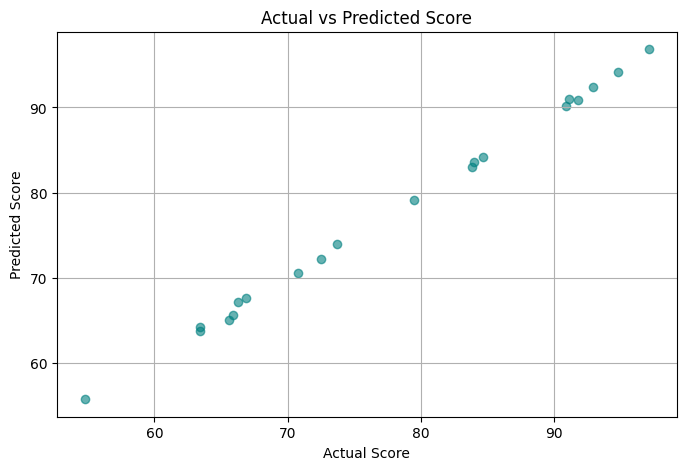

In [16]:
#scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, color='teal', alpha=0.6)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Score")
plt.grid(True)
plt.show()

In [17]:
# Get the actual set of labels from y_test_g and y_pred_g
labels = sorted(set(y_test_g) | set(y_pred_g))

# Print the classification report using the labels parameter
print("\n🎓 Multi-class Classification Report (Grade):")
print(classification_report(y_test_g, y_pred_g, labels=labels, target_names=le.classes_))



🎓 Multi-class Classification Report (Grade):
              precision    recall  f1-score   support

           A       0.14      0.33      0.20         3
          A+       0.67      0.33      0.44         6
           B       0.40      0.25      0.31         8
           C       0.20      0.33      0.25         3

    accuracy                           0.30        20
   macro avg       0.35      0.31      0.30        20
weighted avg       0.41      0.30      0.32        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


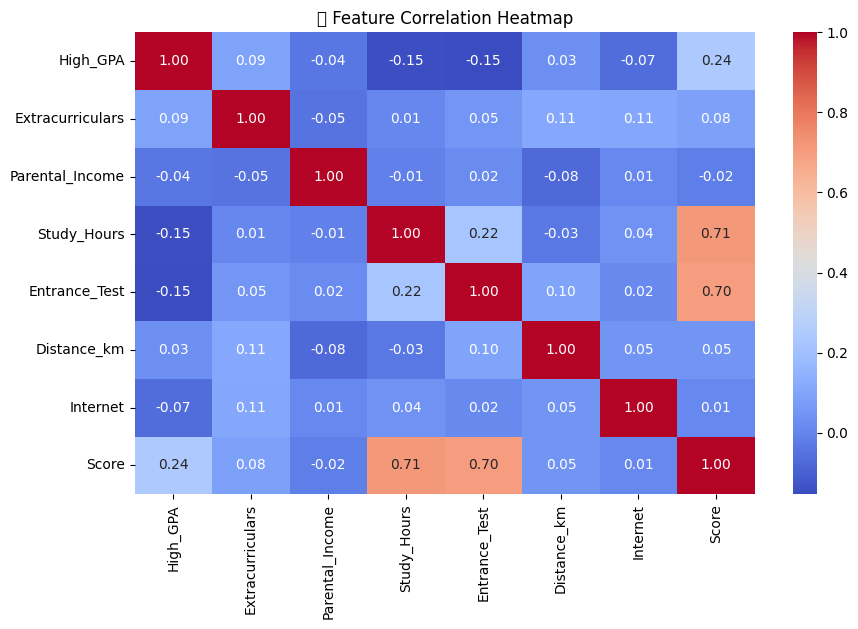

In [19]:
#correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + ['Score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()